In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import phik
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
display(df.head())
print(df.shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


(1025, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

723

In [8]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
df2=df.rename(columns={'thalach':'MaxHeart'})
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,MaxHeart,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Looks like no data cleaning is required as no null or duplicated values. Zero values present in columns is also not missing values but categorical value. So we keep them.

## EDA

<AxesSubplot:>

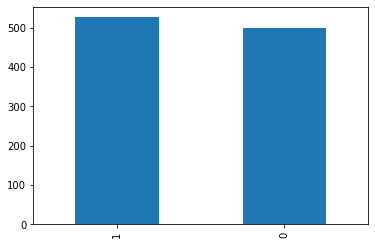

In [10]:
df2['target'].value_counts().plot(kind="bar")

The target value looks balanced as we have almost equal counts of people detected having heart disease (value 1) and not having heart disease (value 0)

<AxesSubplot:xlabel='thal', ylabel='Count'>

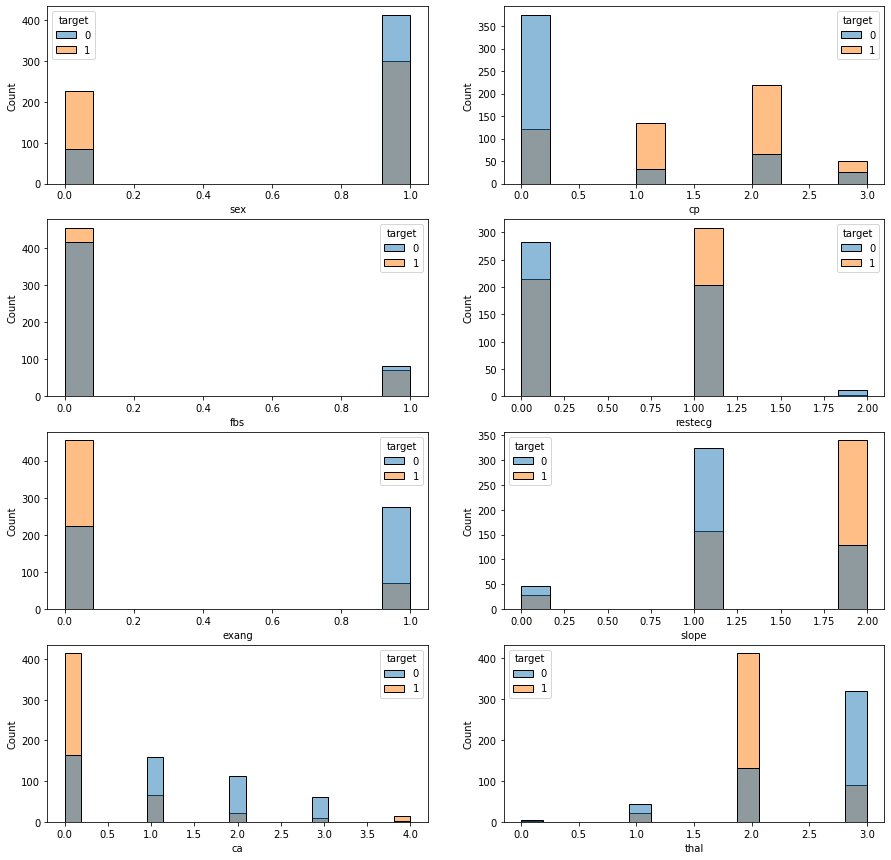

In [11]:
fig, axes = plt.subplots(4,2,figsize=(15, 15))
sns.histplot(data=df2,x='sex',hue='target', ax=axes[0][0])
sns.histplot(data=df2,x='cp',hue='target', ax=axes[0][1])
sns.histplot(data=df2,x='fbs',hue='target', ax=axes[1][0])
sns.histplot(data=df2,x='restecg',hue='target', ax=axes[1][1])
sns.histplot(data=df2,x='exang',hue='target', ax=axes[2][0])
sns.histplot(data=df2,x='slope',hue='target', ax=axes[2][1])
sns.histplot(data=df2,x='ca',hue='target', ax=axes[3][0])
sns.histplot(data=df2,x='thal',hue='target', ax=axes[3][1])

These plots give a good idea of how the counts of people having or not having the heart disease are distributed. People having above level 0 pain have a chance of getting the disease.

<AxesSubplot:xlabel='age', ylabel='chol'>

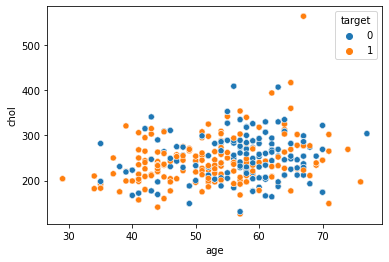

In [12]:
sns.scatterplot(data=df2,x='age',y='chol',hue='target')

People at less age with high cholestral are diagnosed with heart disease.

<AxesSubplot:xlabel='age', ylabel='MaxHeart'>

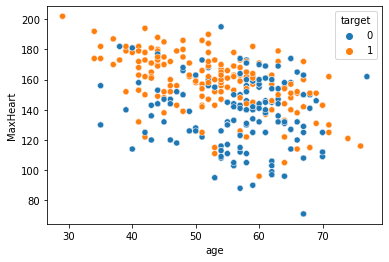

In [13]:
sns.scatterplot(data=df2,x='age',y='MaxHeart',hue='target')

Mostly people haiving high values of heart rates are at risk of being diagnosed with heart disease.

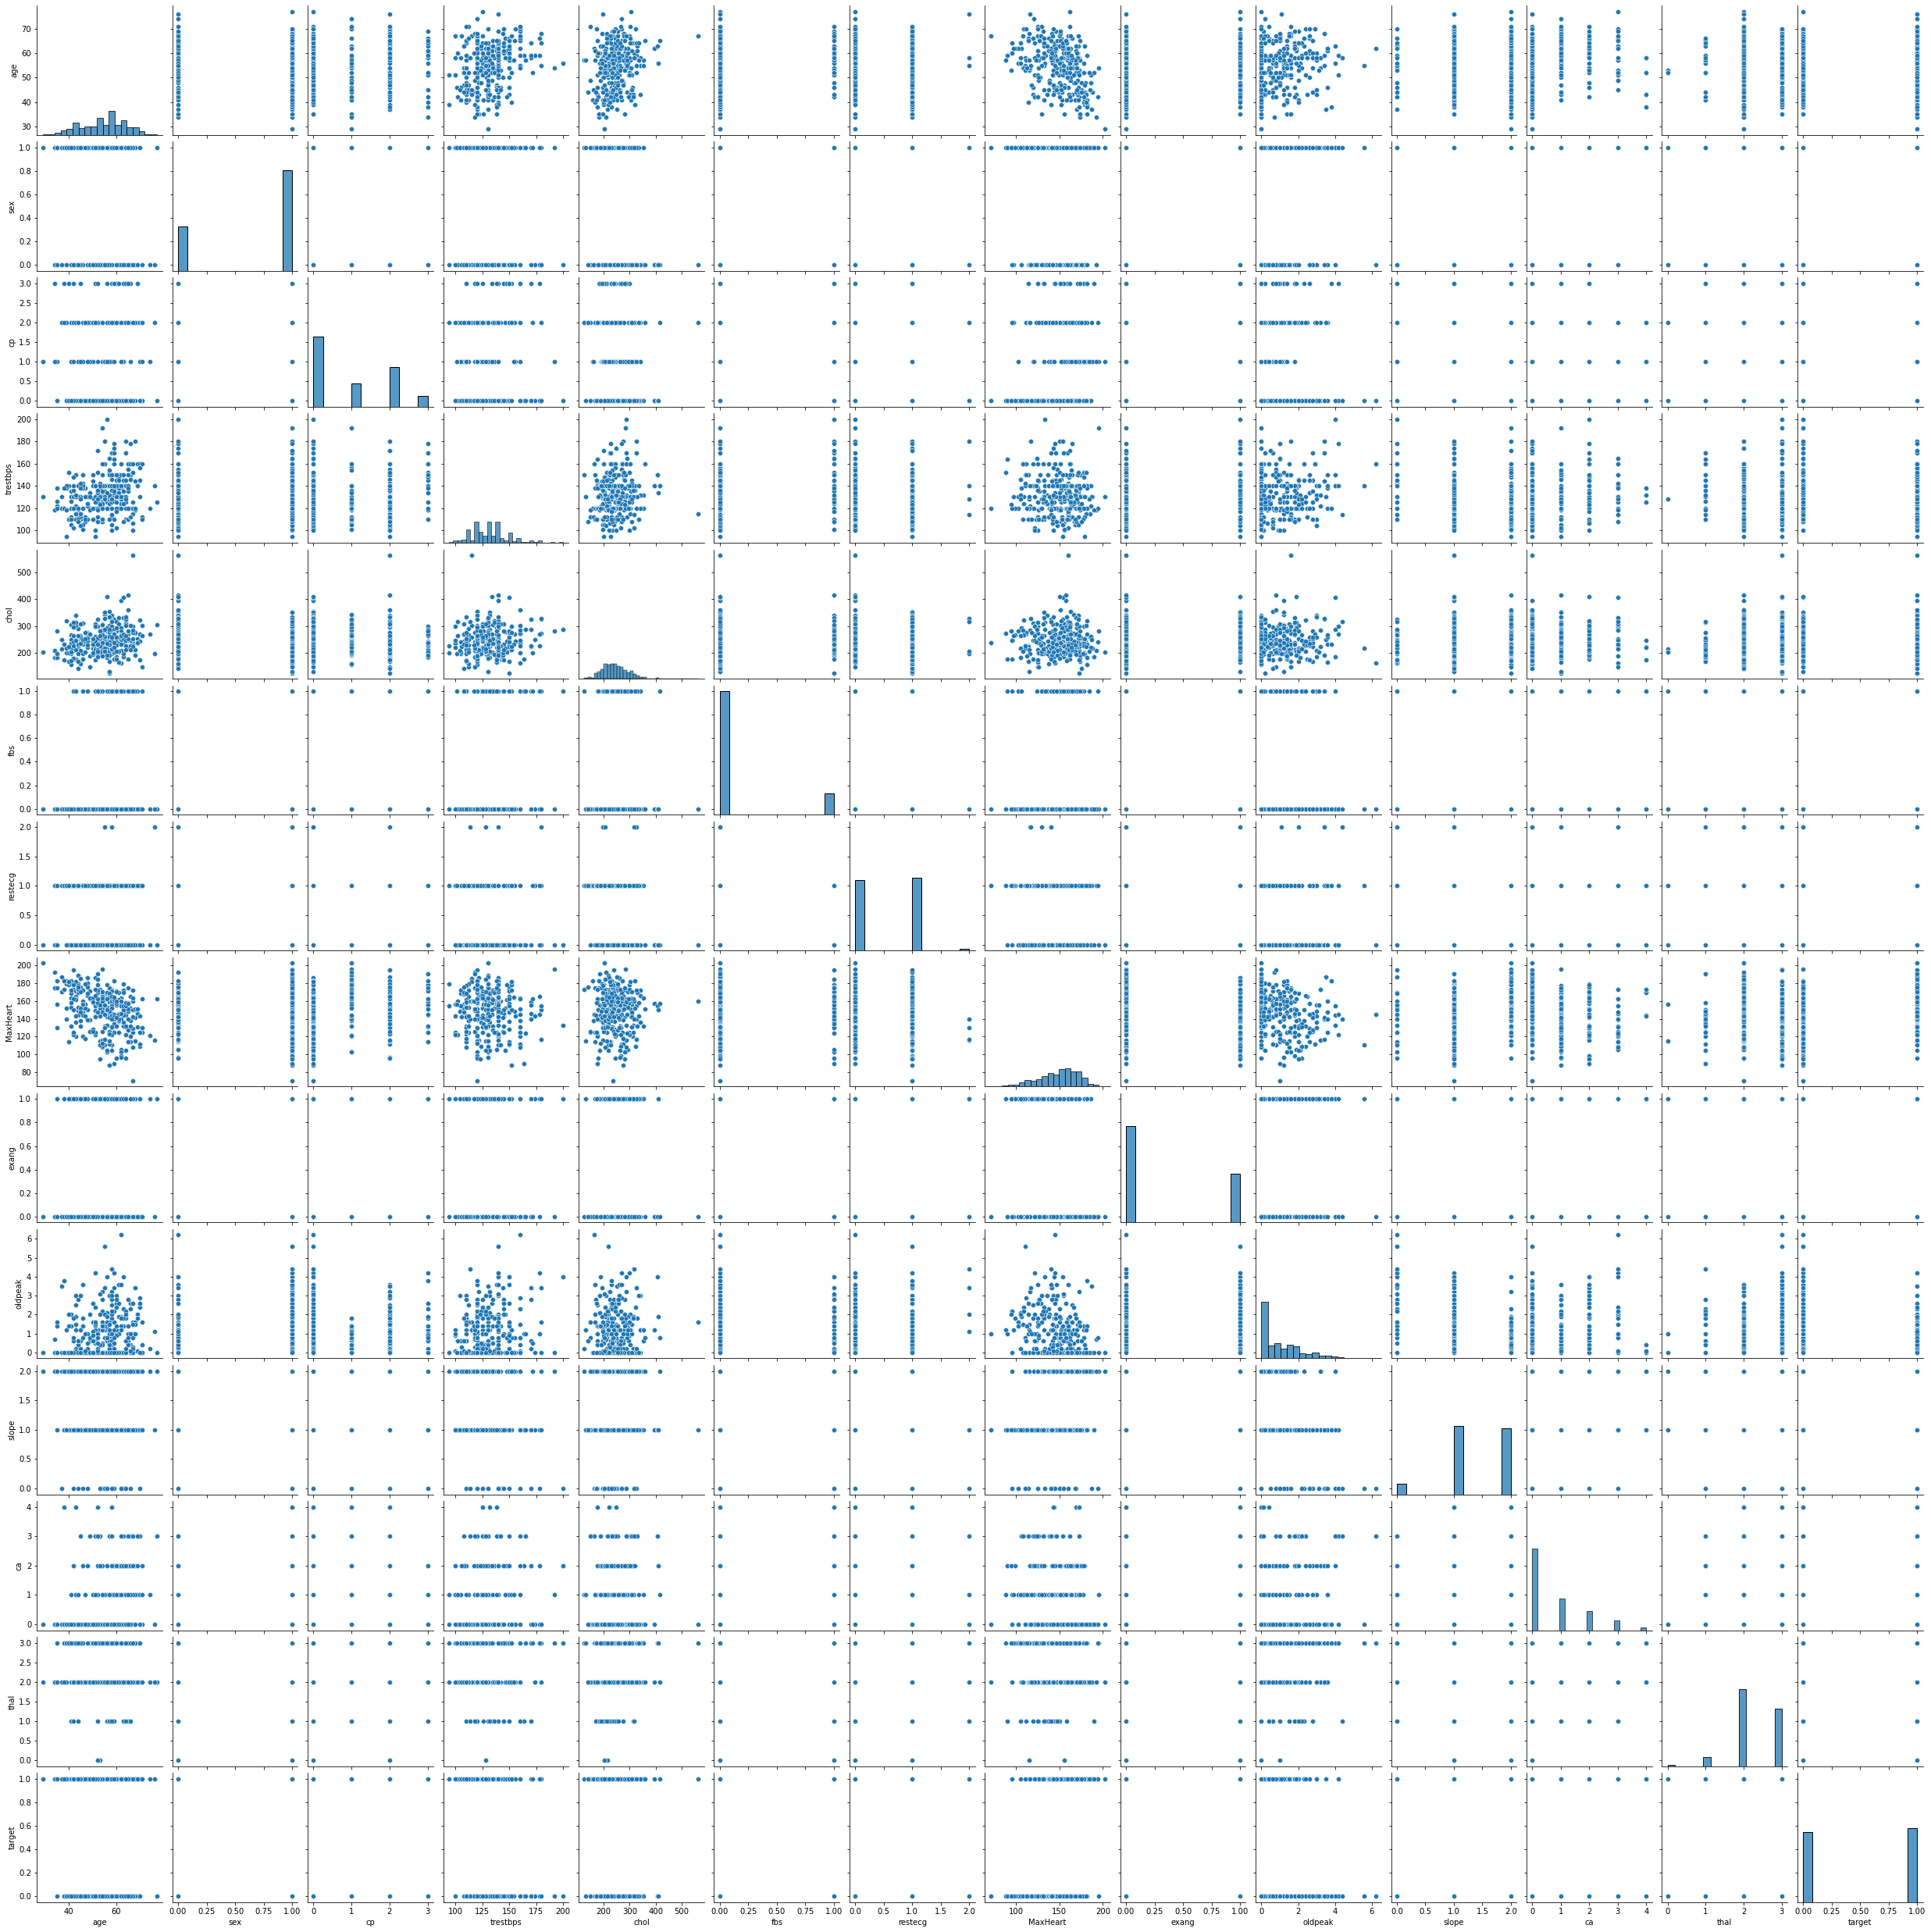

In [14]:
sns.pairplot(df2)

From the pairplots we see the different relationships between the variables :
1. Age amd As Age increases the MaxHeart rate of a person decreases.


<AxesSubplot:>

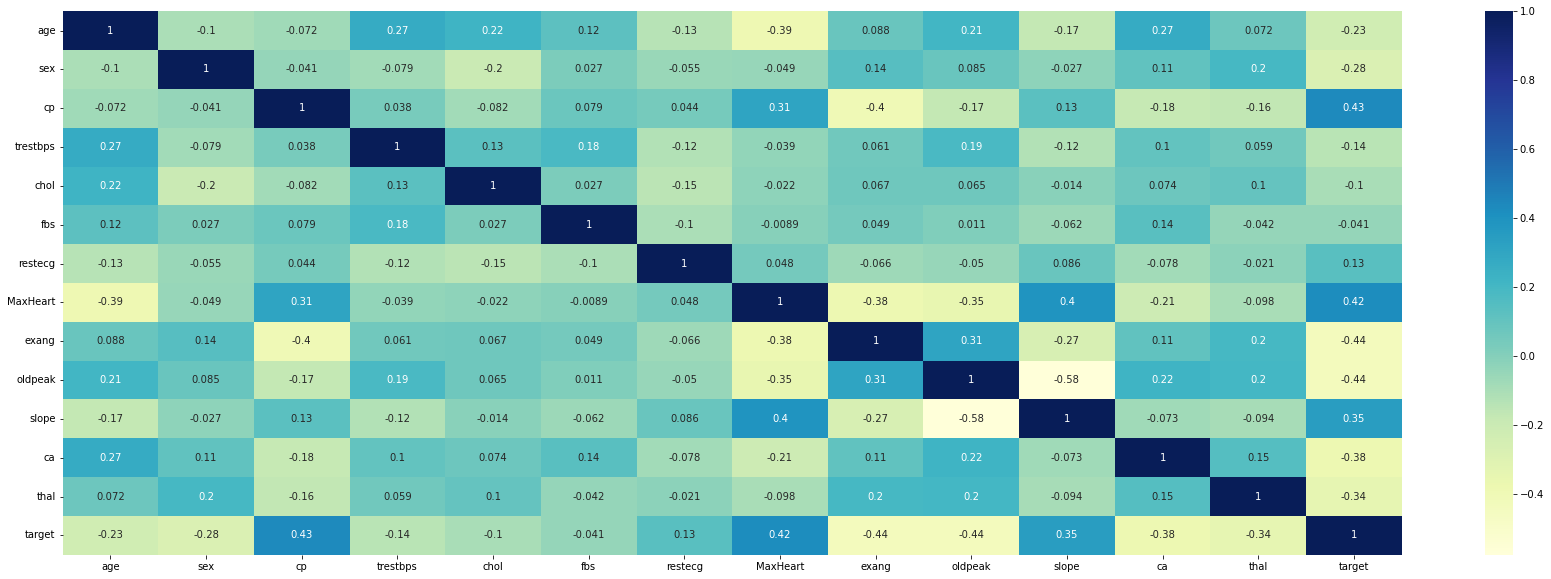

In [15]:
plt.figure(figsize=(30, 10))
sns.heatmap(df2.corr(), annot=True, cmap="YlGnBu")

interval columns not set, guessing: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'MaxHeart', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


<AxesSubplot:>

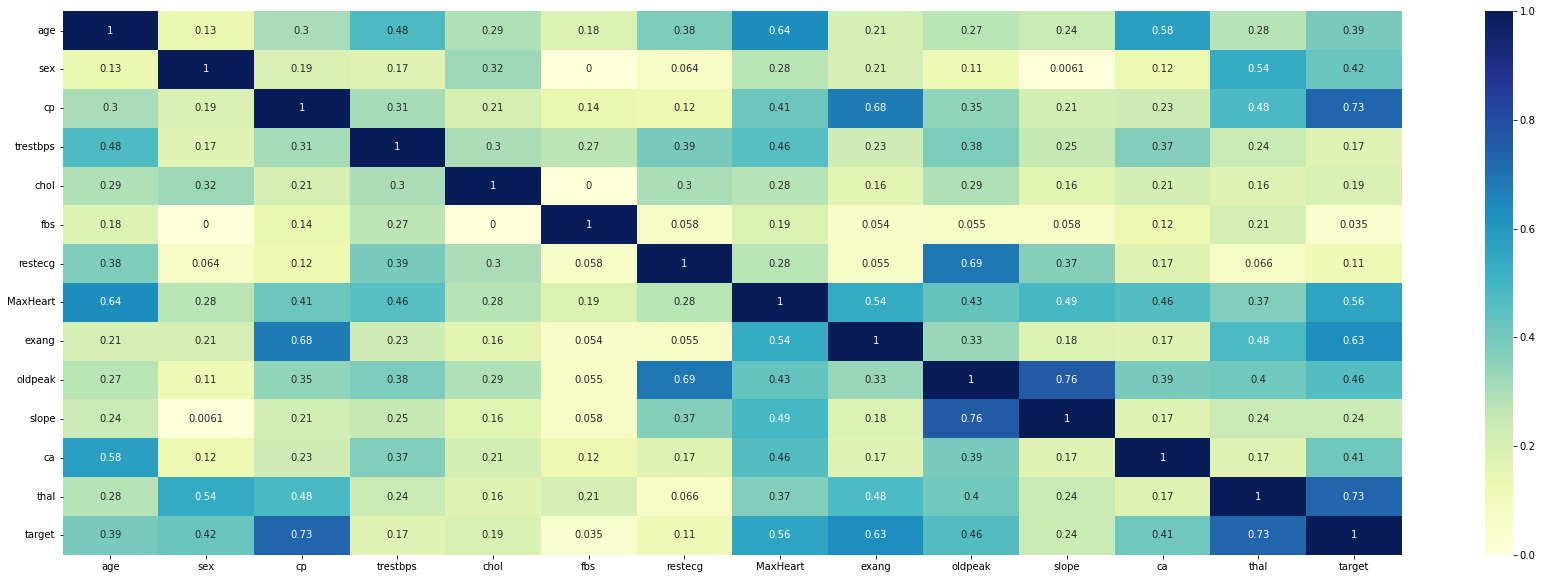

In [16]:
plt.figure(figsize=(30, 10))
sns.heatmap(df2.phik_matrix(), annot=True, cmap="YlGnBu")

Only age, sex, cp, MaxHeart, exang, oldpeak, ca, and thal have high correlation with the target variable. Rest dont have any significant correlation

In [57]:
ranges = [1,30,60,80]
df2['age_range'] = pd.cut(df['age'], ranges)
counts_range=df2['age_range'].value_counts().to_numpy()
counts_range
#df2['age_range'].value_counts()

array([749, 272,   4], dtype=int64)

([<matplotlib.patches.Wedge at 0x1a4b86d5c40>,
 [Text(-0.7293379058410592, 0.8234477634333451, 'Adults (30-60)'),
  Text(0.7191879921313108, -0.8323272385150771, 'Senior Citizens (60-80)'),
  Text(1.0999173338732608, -0.013485497585844355, 'Youth (1-30)')],
 [Text(-0.39782067591330494, 0.4491533255090973, '73.1%'),
  Text(0.3922843593443513, -0.4539966755536783, '26.5%'),
  Text(0.599954909385415, -0.007355725955915102, '0.4%')])

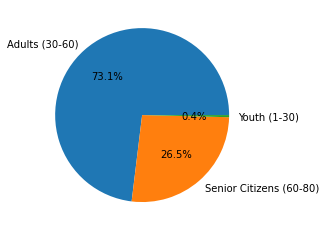

In [58]:
age_labels=['Adults (30-60)', 'Senior Citizens (60-80)', 'Youth (1-30)']
plt.pie(counts_range, labels=age_labels, autopct="%1.1f%%")

We can see that Adults have the most number of people being diagnosed with heart disease. Senior Citizens have a lesser count but there are still a significant amount of people having the disease. Young people have very rare cases 

## Data Modeling

In [17]:
X = df2.iloc[:,:13]
Y = df2['target']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.6, random_state=0)

In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_sc,Y_train)

LogisticRegression()

In [21]:
y_pred_train = model.predict(X_train_sc)
y_pred_test = model.predict(X_test_sc)

In [22]:
print("Train Accuracy score:",accuracy_score(y_pred_train,Y_train)*100)
print("Test Accuracy score:",accuracy_score(y_pred_test,Y_test)*100)

Train Accuracy score: 84.0650406504065
Test Accuracy score: 88.53658536585365


[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

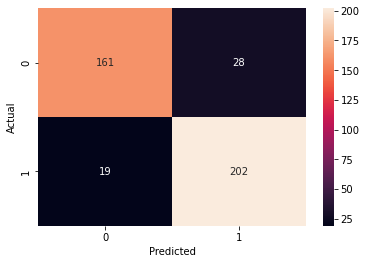

In [23]:
ax = sns.heatmap(confusion_matrix(Y_test,y_pred_test), annot=True, fmt='g')
ax.set(xlabel="Predicted", ylabel="Actual")

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st=scaler.transform(X_train)
X_test_st=scaler.transform(X_test)

In [25]:
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_st,Y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = model2.predict(X_test_st)

In [27]:
accuracy_score(Y_test,y_pred)

0.8731707317073171

When we use standard scaler we can see that the accuracy decreases

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors":range(1,25), "weights":['distance', 'uniform']}

In [29]:
model3= GridSearchCV(KNeighborsClassifier(), parameters)
model3.fit(X_train_sc, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25),
                         'weights': ['distance', 'uniform']})

In [30]:
model3.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [31]:
y_pred_grid=model3.predict(X_test_sc)

In [32]:
mean_squared_error(Y_test, y_pred_grid)

0.007317073170731708

In [33]:
y_pred_gridt=model3.predict(X_train_sc)
print("Train Accuracy Score:",accuracy_score(Y_train,y_pred_gridt)*100)
print("Test Accuracy Score:",accuracy_score(Y_test,y_pred_grid)*100)

Train Accuracy Score: 100.0
Test Accuracy Score: 99.26829268292683


[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

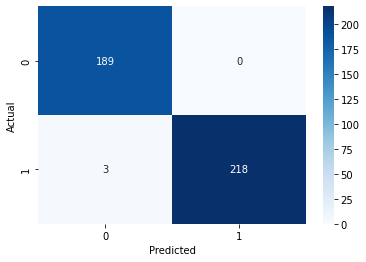

In [34]:
ax = sns.heatmap(confusion_matrix(Y_test, y_pred_grid), annot=True, fmt='g', cmap='Blues')
ax.set(xlabel="Predicted", ylabel="Actual")

In [36]:
print(classification_report(Y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       189
           1       1.00      0.99      0.99       221

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410



As seen in the above classification report, the KNN model with neighbors as 6 is able to classify the target variables with 99% accuracy

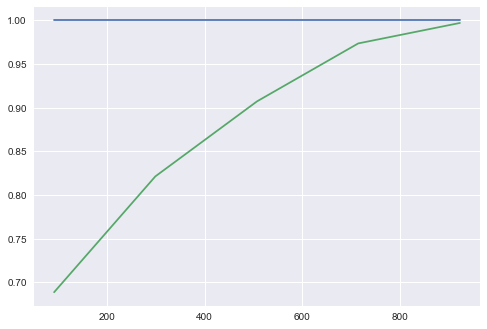

In [39]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores, test_scores = learning_curve(
        model3,
        X,
        Y,
        scoring="accuracy",
cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')